# PART 3: ANOMALLY DETECTION

## Reading in the data

In [1]:
df3 = read.csv('./Supermarket_Sales_Forecasting - Sales.csv')

## Checking the data

In [2]:
head(df3)

Date,Sales
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [3]:
dim(df3)

[1] 1000    2

The data has 1000 rows and 2 columns

In [4]:
# Checking data structure
str(df3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


- df3 is a data frame.
- Date should be a date type and not a factor
- Sales has the correct data type

In [5]:
# Converting sales from a factor to date type
df3$Date <- as.Date(df3$Date, "%m/%d/%Y")

In [6]:
# Checking new data structure.
str(df3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Date, format: "2019-01-05" "2019-03-08" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


Date colums has been converted from a faactor to date with the format "%m/%d/%Y"

## Tidying the dataset

Warning message:
"package 'DataExplorer' was built under R version 3.6.3"

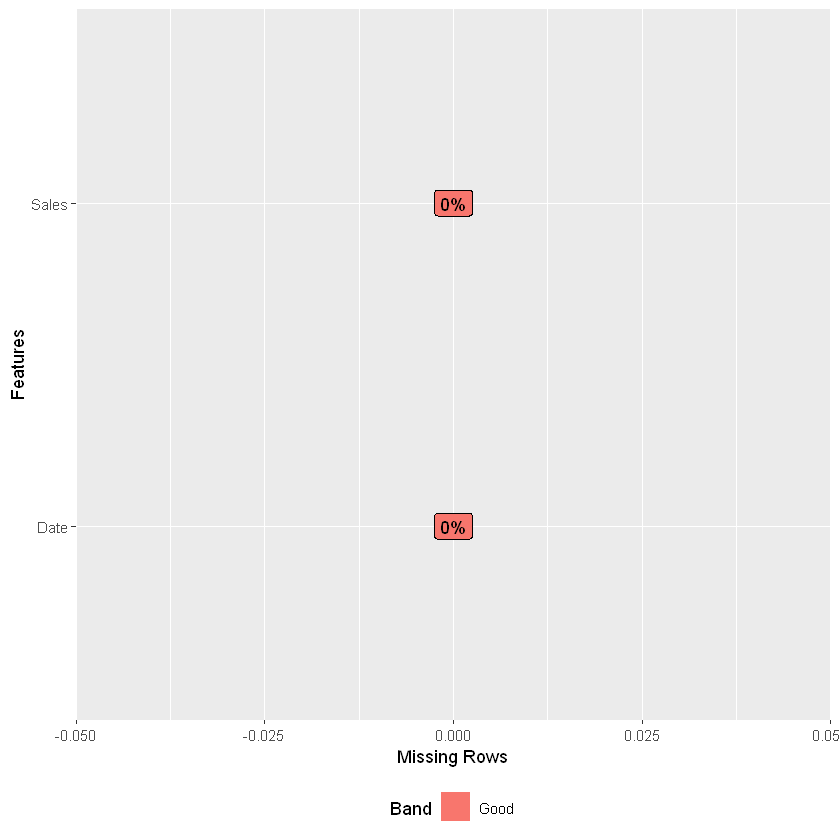

In [7]:
# Checking for missing values.
library(DataExplorer)
plot_missing(df3)

The data has no missing values

In [8]:
# Checking for duplicates.
df3_dup = df3[duplicated(df3), ]
dim(df3_dup)

[1] 0 2

Data has no duplicates

## Exploratory data analysis

In [10]:
# Data preview
head(df3)

Date,Sales
2019-01-05,548.9715
2019-03-08,80.2200
2019-03-03,340.5255
2019-01-27,489.0480
2019-02-08,634.3785
2019-03-25,627.6165


The sales variable is skewed to the right, There are more less values than large values 

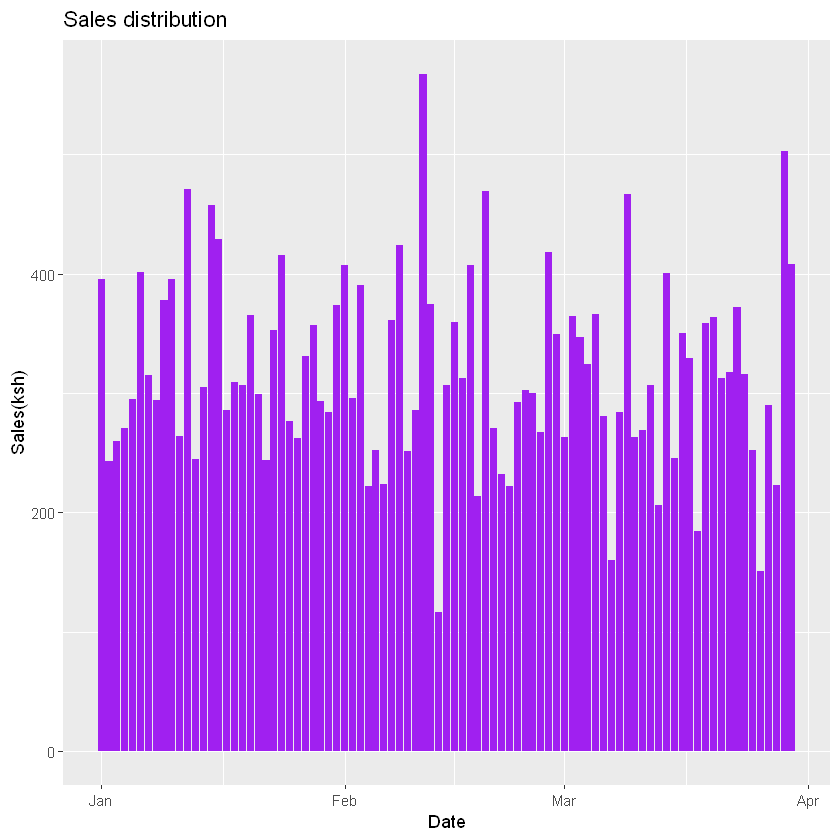

In [22]:
ggplot(data = df3, aes(x = Date, y = Sales)) +
      geom_bar(stat = "identity", fill = "purple") +
      labs(title = "Sales distribution",
           x = "Date", y = "Sales(ksh)")

The sales fluctuate over the months. Highest sales occured in february

## IMPLEMENTING SOLUTION: Detecting anomalies in the data

In [14]:
# Importing libraries
library(tidyverse)
library(anomalize)
library(tibbletime)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     
Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()
Warning message:
"package 'anomalize' was built 

In [15]:
# Previewing the data
head(df3)

Date,Sales
2019-01-05,548.9715
2019-03-08,80.2200
2019-03-03,340.5255
2019-01-27,489.0480
2019-02-08,634.3785
2019-03-25,627.6165


The data is not ordered, therefore we order the data by the Date column

In [16]:
# Loading the library
library(tidyverse)

#Ordering the data by Date
df3 = df3 %>% arrange(Date)
head(df3)

Date,Sales
2019-01-01,457.443
2019-01-01,399.756
2019-01-01,470.673
2019-01-01,388.290
2019-01-01,132.762
2019-01-01,132.027


The data is now ordered by date

- Before anomally detection, we ensure that the date column has a period that is allowed for an index of class Date.
- Only year, quarter, month, week, and day periods are allowed for an index of class Date.
- Since our data has many records per day, I will get the average per day, so that the data has one record per day.

In [17]:
df3 = aggregate(Sales ~ Date, df3, mean)
head(df3)

Date,Sales
2019-01-01,395.4318
2019-01-02,243.1879
2019-01-03,259.7661
2019-01-04,270.6148
2019-01-05,294.7236
2019-01-06,401.5783


The data now has one record per day

In [18]:
# Converting data frame to a tibble time (tbl_time)
# tbl_time have a time index that contains information about which column 
# should be used for time-based subsetting and other time-based manipulation,

df3 = tbl_time(df3, Date)
class(df3)

[1] "tbl_time"   "tbl_df"     "tbl"        "data.frame"

In [19]:
# Checking the dimensions of the reduced data set
dim(df3)

[1] 89  2

- The data has been reduced to 89 rows.
- The 89 rows will be used to check for anomalies

frequency = 7 days
trend = 30 days
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


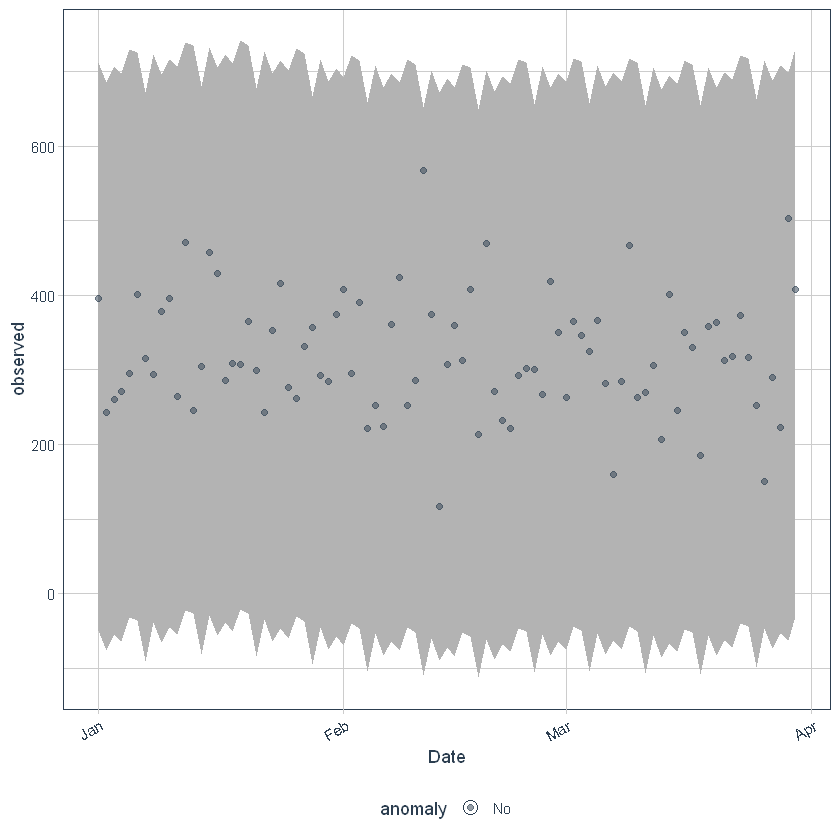

In [20]:
df3 %>%
    time_decompose(Sales) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 2, alpha_dots = 0.5)


Our data has no outliers

## Challenging the solution

- Getting the average of the sales per day may have reduced the effect of outliers, thus it was unable for them to be captured in the anomalies plot. 
- If the library would allow repeated period indexing, then maybe the outliers effect would no be suppressed
